In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

data = pd.read_csv('C:/Users/Pyter/DA/BaiTap/Credit_Scoring.csv', encoding = "ISO-8859-1")

In [2]:
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [4]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
for index, column in enumerate(data.columns):
    temp = data.loc[:,column].isna()
    if temp.sum() > 0:
        print('Cột', data.columns[index], 'chứa' , temp.sum() , 'giá trị KT')

Cột MonthlyIncome chứa 29730 giá trị KT
Cột NumberOfDependents chứa 3924 giá trị KT


In [6]:
values = {'NumberOfDependents':'0'}
data.fillna(value=values, inplace=True)

In [7]:
data['MonthlyIncome'].interpolate(inplace=True)

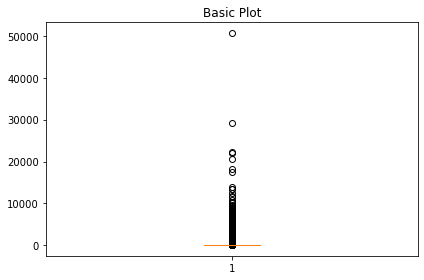

In [22]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data.loc[:,['RevolvingUtilizationOfUnsecuredLines']])
fig1.tight_layout()
# fig, axs = plt.subplots(2, 2)
# axs1.hist(nhapho.loc[:, cols], bins=10)
# axs1.set_title('original')
# fig1.tight_layout()

In [18]:
for i in data.columns:
    for j in data.columns:
        print(data.loc[:,[f'{j}']])
#         plt.boxplot(data.loc[:,[f'{j}']])

        Unnamed: 0
0                9
1               10
2               11
3               12
4               13
...            ...
149987      149996
149988      149997
149989      149998
149990      149999
149991      150000

[149992 rows x 1 columns]
        SeriousDlqin2yrs
0                      0
1                      0
2                      0
3                      0
4                      0
...                  ...
149987                 0
149988                 0
149989                 0
149990                 0
149991                 0

[149992 rows x 1 columns]
        RevolvingUtilizationOfUnsecuredLines
0                                   0.116951
1                                   0.189169
2                                   0.644226
3                                   0.018798
4                                   0.010352
...                                      ...
149987                              0.040674
149988                              0.299745
149989       

[149992 rows x 1 columns]
        NumberOfTime30-59DaysPastDueNotWorse
0                                          0
1                                          0
2                                          0
3                                          0
4                                          0
...                                      ...
149987                                     0
149988                                     0
149989                                     0
149990                                     0
149991                                     0

[149992 rows x 1 columns]
          DebtRatio
0         46.000000
1          0.606291
2          0.309476
3          0.531529
4          0.298354
...             ...
149987     0.225131
149988     0.716562
149989  3870.000000
149990     0.000000
149991     0.249908

[149992 rows x 1 columns]
        MonthlyIncome
0                 NaN
1             23684.0
2              2500.0
3              6501.0
4             12454.0
...     